<a href="https://colab.research.google.com/github/malikaakhtar72-cmd/100083/blob/main/water.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload MULTIPLE images (10 recommended)


Saving download (1).jpg to download (1).jpg
Saving download (2).jpg to download (2).jpg
Saving download (3).jpg to download (3).jpg
Saving download (5).jpg to download (5).jpg
Saving download (6).jpg to download (6).jpg
Saving download (7).jpg to download (7).jpg
Saving download (9).jpg to download (9).jpg
Saving download (10).jpg to download (10).jpg
Saving download.jpg to download.jpg


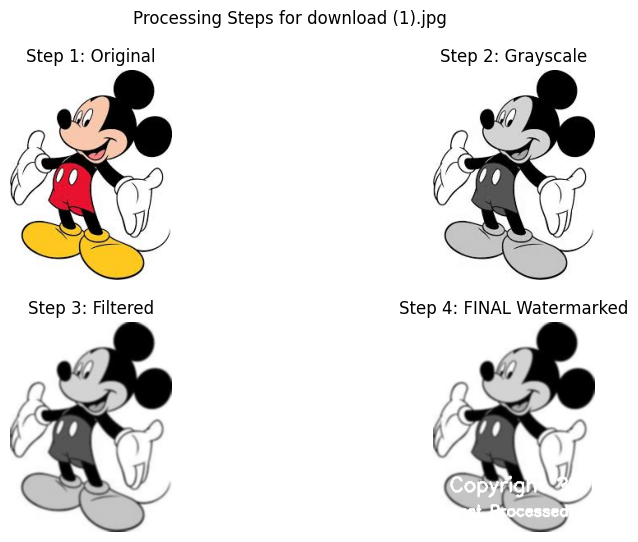

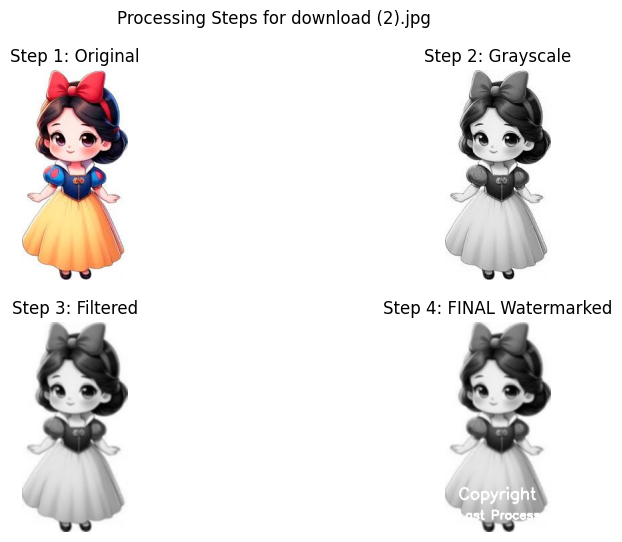

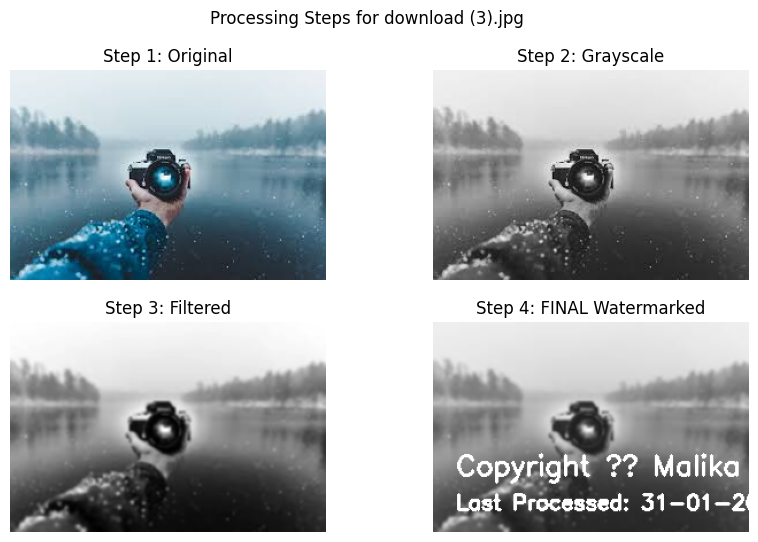

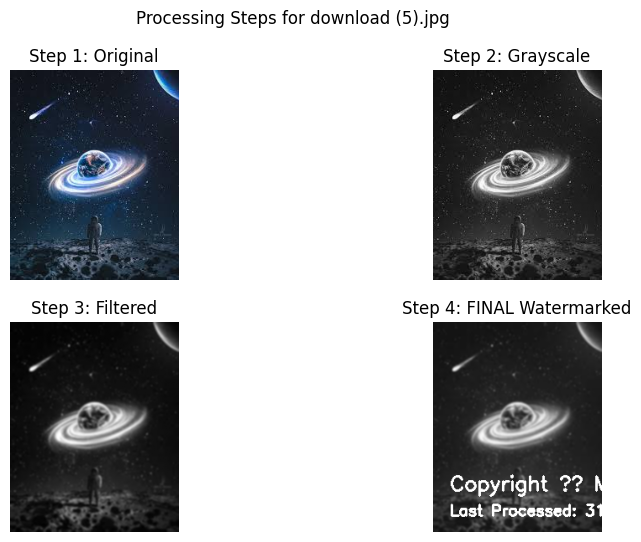

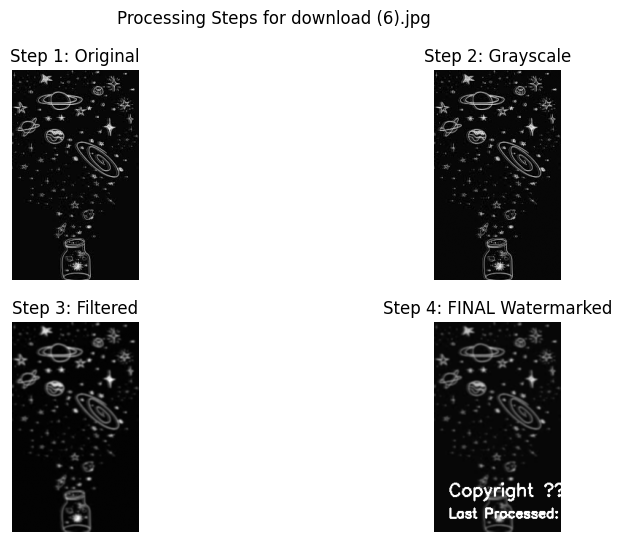

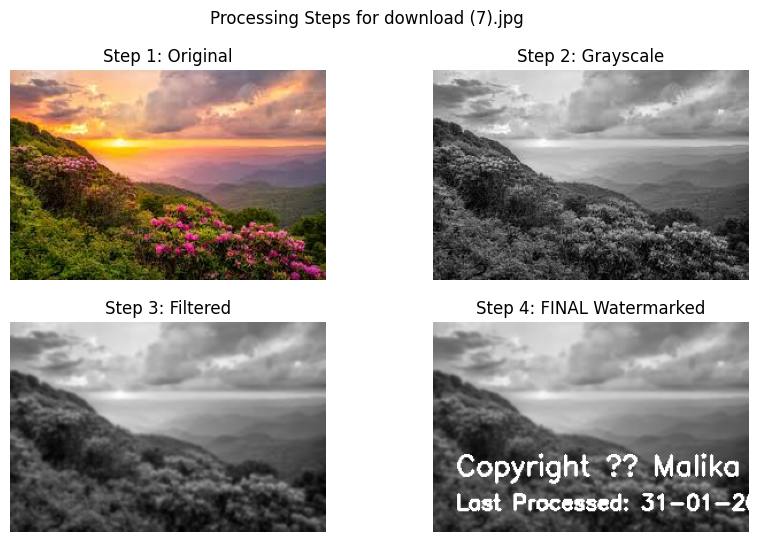

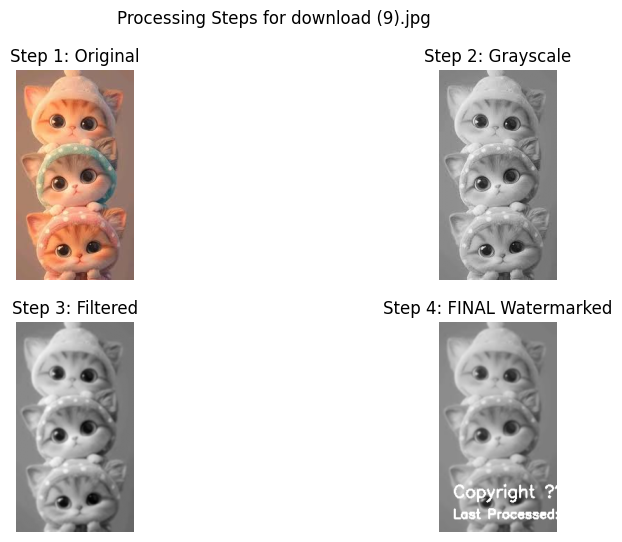

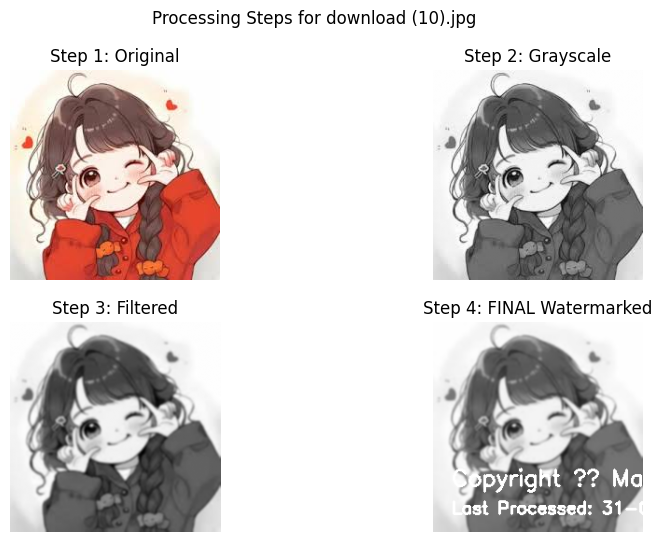

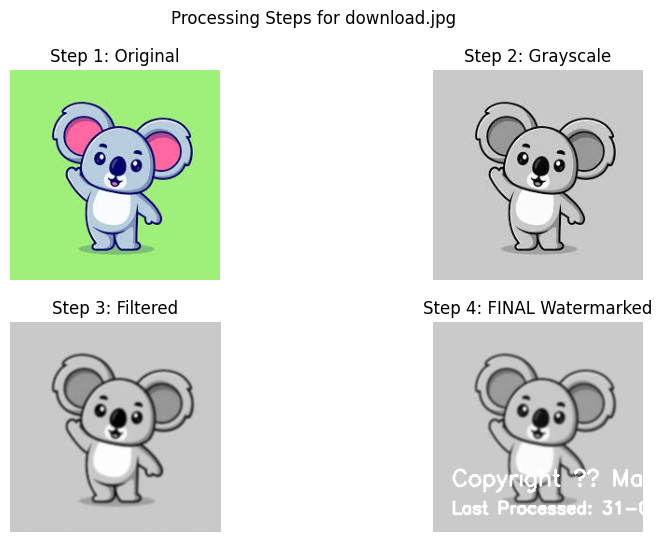

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ All images processed step-by-step. Watermark applied LAST.


In [1]:
# STEP-WISE IMAGE WATERMARKING SYSTEM
# Digital Image Processing Project
# Shows FULL processing proof

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from datetime import datetime
import os
import shutil

# Step 1: Upload multiple images
print("Upload MULTIPLE images (10 recommended)")
uploaded = files.upload()

# Output folders
os.makedirs("results/original", exist_ok=True)
os.makedirs("results/grayscale", exist_ok=True)
os.makedirs("results/filtered", exist_ok=True)
os.makedirs("results/watermarked", exist_ok=True)

# Current date & time (proof of last step)
current_time = datetime.now().strftime("%d-%m-%Y  %H:%M:%S")

# Process each image
for image_name in uploaded.keys():

    # -------- Step 1: Original Image --------
    image = cv2.imread(image_name)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    cv2.imwrite(f"results/original/{image_name}", image)

    # -------- Step 2: Grayscale --------
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(f"results/grayscale/gray_{image_name}", gray)

    # -------- Step 3: Filtering (Gaussian Blur) --------
    filtered = cv2.GaussianBlur(gray, (5,5), 0)
    cv2.imwrite(f"results/filtered/filtered_{image_name}", filtered)

    # -------- Step 4: Watermark (LAST STEP) --------
    watermarked = cv2.cvtColor(filtered, cv2.COLOR_GRAY2RGB)

    h, w, _ = watermarked.shape
    text1 = "Copyright © Malika"
    text2 = f"Last Processed: {current_time}"

    cv2.putText(watermarked, text1, (20, h-50),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255,255,255), 2)

    cv2.putText(watermarked, text2, (20, h-20),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 2)

    cv2.imwrite(f"results/watermarked/wm_{image_name}",
                cv2.cvtColor(watermarked, cv2.COLOR_RGB2BGR))

    # -------- Display all steps --------
    plt.figure(figsize=(10,6))

    plt.subplot(2,2,1)
    plt.title("Step 1: Original")
    plt.imshow(image_rgb)
    plt.axis("off")

    plt.subplot(2,2,2)
    plt.title("Step 2: Grayscale")
    plt.imshow(gray, cmap='gray')
    plt.axis("off")

    plt.subplot(2,2,3)
    plt.title("Step 3: Filtered")
    plt.imshow(filtered, cmap='gray')
    plt.axis("off")

    plt.subplot(2,2,4)
    plt.title("Step 4: FINAL Watermarked")
    plt.imshow(watermarked)
    plt.axis("off")

    plt.suptitle(f"Processing Steps for {image_name}", fontsize=12)
    plt.show()

# Zip all results
shutil.make_archive("DIP_Watermarking_Results", 'zip', "results")
files.download("DIP_Watermarking_Results.zip")

print("✅ All images processed step-by-step. Watermark applied LAST.")